In [138]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras import layers, models
from tensorflow.keras import losses
import keras

## 데이터셋 로드 및 분리

In [161]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=500)

In [162]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [163]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"훈련 데이터 개수: {len(X_train)}")
print(f"검증 데이터 개수: {len(X_valid)}")
print(f"테스트 데이터 개수: {len(X_test)}")

훈련 데이터 개수: 20000
검증 데이터 개수: 5000
테스트 데이터 개수: 25000


In [164]:
train_sentence_lengths = [len(sentence) for sentence in X_train]
mean_sentence_length = np.mean(train_sentence_lengths)
print(f"평균 문장 길이: {mean_sentence_length}")

평균 문장 길이: 239.00925


In [165]:
# 최대 길이 250으로 패딩
X_train = sequence.pad_sequences(X_train, maxlen=250)
X_valid = sequence.pad_sequences(X_valid, maxlen=250)
X_test = sequence.pad_sequences(X_test, maxlen=250)

In [166]:
print(X_train.shape)

(20000, 250)


## 모델 정의

In [167]:
# 공통 임베딩 레이어 설정
max_features = 500
embedding_layer = layers.Embedding(input_dim=max_features, output_dim=16, input_length=250)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [118]:
from tensorflow.keras.callbacks import EarlyStopping

# 조기 종료 콜백 정의
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [152]:
# RNN 모델 정의
rnn_model = models.Sequential([
    embedding_layer,                                # 단어 임베딩
    layers.SimpleRNN(16),   # RNN 레이어
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')           # 출력 레이어: 이진 분류
])


# RNN 모델 컴파일
rmsprop_rnn = keras.optimizers.RMSprop(learning_rate=1e-4)

rnn_model.compile(optimizer=rmsprop_rnn,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [155]:
# LSTM 모델 정의
lstm_model = models.Sequential([
    embedding_layer,                            # 단어 임베딩
    layers.LSTM(16),    # LSTM 레이어
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')       # 출력 레이어: 이진 분류
])

# LSTM 모델 컴파일
rmsprop_lstm = keras.optimizers.RMSprop(learning_rate=1e-4)

lstm_model.compile(optimizer=rmsprop_lstm,
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [154]:
# GRU 모델 정의
gru_model = models.Sequential([
    embedding_layer,                            # 단어 임베딩
    layers.GRU(16),     # GRU 레이어
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')       # 출력 레이어: 이진 분류
])

# GRU 모델 컴파일
rmsprop_gru = keras.optimizers.RMSprop(learning_rate=1e-4)

gru_model.compile(optimizer=rmsprop_gru,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [156]:
# 각 모델 요약
print("Simple RNN Model Summary")
rnn_model.summary()

print("\nLSTM Model Summary")
lstm_model.summary()

print("\nGRU Model Summary")
gru_model.summary()

Simple RNN Model Summary


Model: "sequential_36"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 250, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_15 (SimpleRNN)            │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,000 (31.25 KB)

 Trainable params: 8,000 (31.25 KB)

 Non-trainable params: 0 (0.00 B)


LSTM Model Summary


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 250, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_12 (LSTM)                       │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,000 (31.25 KB)

 Trainable params: 8,000 (31.25 KB)

 Non-trainable params: 0 (0.00 B)


GRU Model Summary


Model: "sequential_38"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ (None, 250, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_10 (GRU)                         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,000 (31.25 KB)

 Trainable params: 8,000 (31.25 KB)

 Non-trainable params: 0 (0.00 B)

## 모델 학습

In [157]:
# 각 모델 학습
history_rnn = rnn_model.fit(X_train, y_train,
                            validation_data=(X_valid, y_valid),
                            epochs=30,
                            batch_size=64)
history_lstm = lstm_model.fit(X_train, y_train,
                              validation_data=(X_valid, y_valid),
                              epochs=30,
                              batch_size=64)
history_gru = gru_model.fit(X_train, y_train,
                            validation_data=(X_valid, y_valid),
                            epochs=30,
                            batch_size=64)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 40ms/step - accuracy: 0.5096 - loss: 0.7274 - val_accuracy: 0.6130 - val_loss: 0.6559
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.6639 - loss: 0.6172 - val_accuracy: 0.7450 - val_loss: 0.5466
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.7543 - loss: 0.5369 - val_accuracy: 0.7412 - val_loss: 0.5483
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7554 - loss: 0.5351 - val_accuracy: 0.7574 - val_loss: 0.5224
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.7720 - loss: 0.5156 - val_accuracy: 0.7582 - val_loss: 0.5218
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.7667 - loss: 0.5238 - val_accuracy: 0.7644 - val_loss: 0.5146
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.7816 - loss: 0.4998 - val_accuracy: 0.7622 - val_loss: 0.5118
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.7891 - loss: 0.4923 - val

## 모델 평가

In [158]:
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test, y_test)
lstm_loss, lstm_accuracy = lstm_model.evaluate(X_test, y_test)
gru_loss, gru_accuracy = gru_model.evaluate(X_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.7320 - loss: 0.5675
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8296 - loss: 0.3887
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8481 - loss: 0.3538


In [159]:
print("RNN\n---------------------------------")
print("Accuracy: ", rnn_accuracy)
print("Loss: ", rnn_loss)
print()
print("LSTM\n---------------------------------")
print("Accuracy: ", lstm_accuracy)
print("Loss: ", lstm_loss)
print()
print("GRU\n---------------------------------")
print("Accuracy: ", gru_accuracy)
print("Loss: ", gru_loss)

RNN
---------------------------------
Accuracy:  0.7287999987602234
Loss:  0.5716962218284607

LSTM
---------------------------------
Accuracy:  0.8288800120353699
Loss:  0.38830897212028503

GRU
---------------------------------
Accuracy:  0.8470399975776672
Loss:  0.35527941584587097


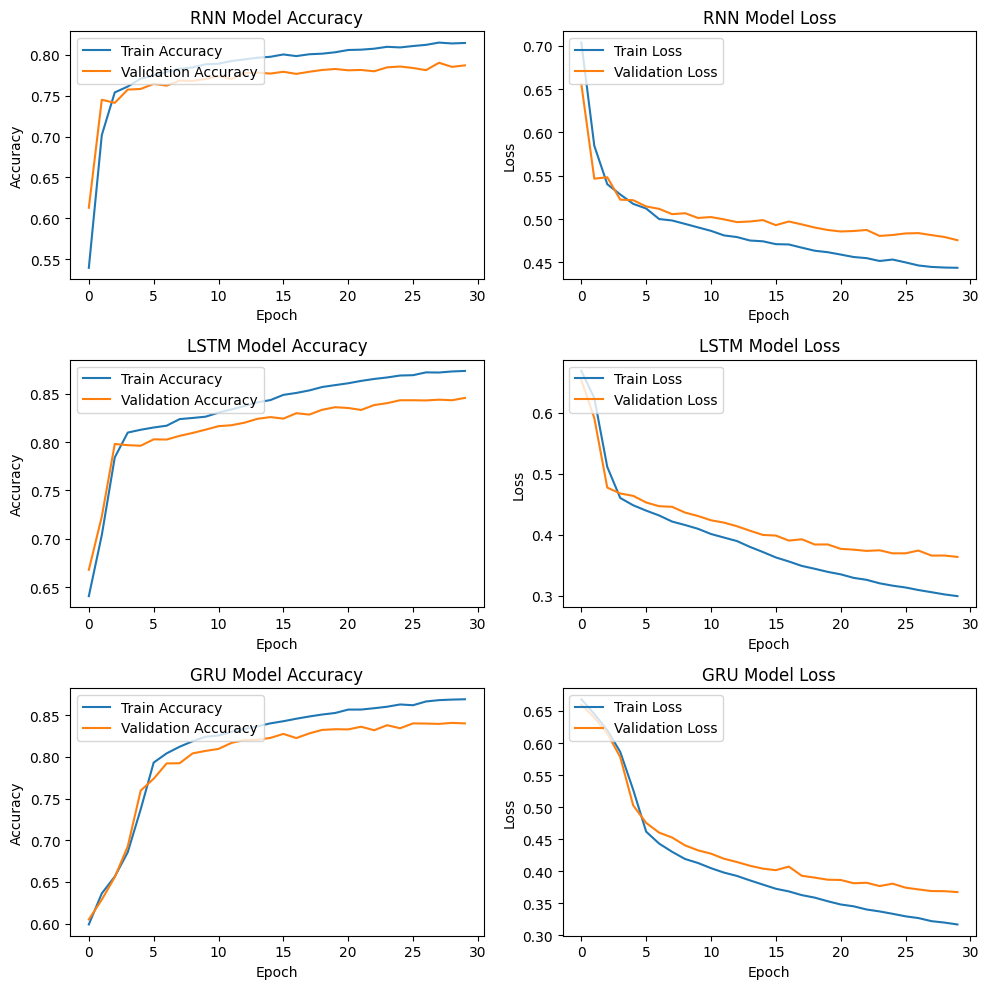

In [160]:
# 그래프로 출력

import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# RNN 모델 정확도 및 손실 그래프
axs[0, 0].plot(history_rnn.history['accuracy'], label='Train Accuracy')
axs[0, 0].plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
axs[0, 0].set_title('RNN Model Accuracy')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].legend(loc='upper left')

axs[0, 1].plot(history_rnn.history['loss'], label='Train Loss')
axs[0, 1].plot(history_rnn.history['val_loss'], label='Validation Loss')
axs[0, 1].set_title('RNN Model Loss')
axs[0, 1].set_ylabel('Loss')
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].legend(loc='upper left')

# LSTM 모델 정확도 및 손실 그래프
axs[1, 0].plot(history_lstm.history['accuracy'], label='Train Accuracy')
axs[1, 0].plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
axs[1, 0].set_title('LSTM Model Accuracy')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].legend(loc='upper left')

axs[1, 1].plot(history_lstm.history['loss'], label='Train Loss')
axs[1, 1].plot(history_lstm.history['val_loss'], label='Validation Loss')
axs[1, 1].set_title('LSTM Model Loss')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].legend(loc='upper left')

# GRU 모델 정확도 및 손실 그래프
axs[2, 0].plot(history_gru.history['accuracy'], label='Train Accuracy')
axs[2, 0].plot(history_gru.history['val_accuracy'], label='Validation Accuracy')
axs[2, 0].set_title('GRU Model Accuracy')
axs[2, 0].set_ylabel('Accuracy')
axs[2, 0].set_xlabel('Epoch')
axs[2, 0].legend(loc='upper left')

axs[2, 1].plot(history_gru.history['loss'], label='Train Loss')
axs[2, 1].plot(history_gru.history['val_loss'], label='Validation Loss')
axs[2, 1].set_title('GRU Model Loss')
axs[2, 1].set_ylabel('Loss')
axs[2, 1].set_xlabel('Epoch')
axs[2, 1].legend(loc='upper left')

# 레이아웃 최적화 및 그래프 표시
plt.tight_layout()
plt.show()